[a, b] = [0, 5], h=0,02, eps=0,00000001

In [262]:
def Si(x: float, eps=0.0000001) -> float:
    """Интегральный синус"""
    n = 0
    a = x
    q = -x*x*(2*n+1) / ((2*n+3)*(2*n+3)*(2*n+2))
    fx = a

    while abs(a) >= eps:
        q = -x*x*(2*n+1) / ((2*n+3)*(2*n+3)*(2*n+2))
        n += 1
        a *= q
        fx += a

    return fx

def dSi(x: float, eps=0.0000001) -> float:
    """Производная интегрального синуса"""
    n = 0
    a = 1
    q = -x*x / ((2*n+2)*(2*n+3))
    fx = a

    while abs(a) >= eps:
        q = -x*x / ((2*n+2)*(2*n+3))
        n += 1
        a *= q
        fx += a

    return fx

In [263]:
a, b, h = 0, 5, 0.02
xs, ys, ys1 = [], [], []
print(f"x,Si(x),dSi(x)")
while (a <= b): #Si(x)
    y = Si(a)
    y1 = dSi(a)
    #print(f"Si({round(a, 8)}) = {round(y, 8)}", end = "     |    ")
    #print(f"dSi({round(a, 8)}) = {round(y1, 8)}")
    
    print(f"{round(a, 2)},{round(y, 8)},{round(y1,8)}")
    a += h

    xs.append(a)
    ys.append(y)
    ys1.append(y1)


x,Si(x),dSi(x)
0,0,1.0
0.02,0.01999956,0.99993333
0.04,0.03999644,0.99973335
0.06,0.059988,0.99940011
0.08,0.07997156,0.99893367
0.1,0.09994446,0.99833417
0.12,0.11990404,0.99760173
0.14,0.13984765,0.99673653
0.16,0.15977262,0.99573879
0.18,0.17967631,0.99460874
0.2,0.19955609,0.99334665
0.22,0.2194093,0.99195283
0.24,0.23923333,0.99042761
0.26,0.25902553,0.98877135
0.28,0.27878331,0.98698446
0.3,0.29850404,0.98506736
0.32,0.31818514,0.9830205
0.34,0.337824,0.98084439
0.36,0.35741806,0.97853954
0.38,0.37696473,0.9761065
0.4,0.39646146,0.97354586
0.42,0.41590572,0.97085822
0.44,0.43529495,0.96804424
0.46,0.45462665,0.96510458
0.48,0.4738983,0.96203995
0.5,0.49310742,0.95885108
0.52,0.51225152,0.95553873
0.54,0.53132815,0.95210369
0.56,0.55033486,0.94854678
0.58,0.56926921,0.94486886
0.6,0.58812881,0.94107079
0.62,0.60691125,0.93715348
0.64,0.62561416,0.93311788
0.66,0.64423518,0.92896493
0.68,0.66277198,0.92469562
0.7,0.68122224,0.92031098
0.72,0.69958366,0.91581204
0.74,0.71785397,0.91

### Графики интегрального синуса и его производной

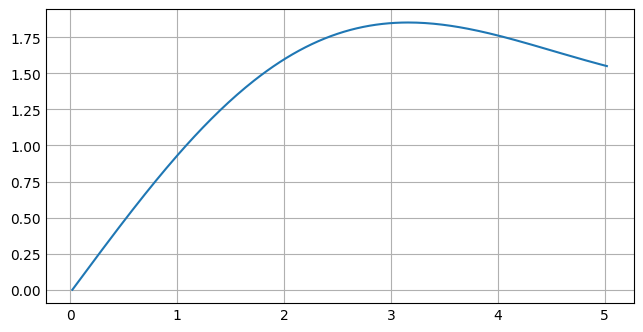

In [264]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = xs
y = ys

# plot
plt.rcParams["figure.figsize"] = (6,3)
plt.plot(x, y)

plt.show()

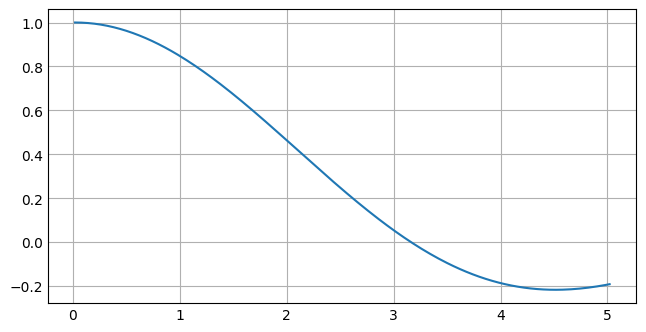

In [265]:
plt.style.use('_mpl-gallery')

# make data
x = xs
y = ys1

# plot
plt.rcParams["figure.figsize"] = (6,3)
plt.plot(x, y)

plt.show()

### Полином Лагранжа

In [325]:
a, b, n = 0, 5, 30
h = round((b-a) / (n), 5)
nodes = []

while (a <= b):     #находим узлы
    nodes.append(round(a, 5))
    a += h
def Lagrange_polynomial(x: float, nodes: list[float] = nodes) -> float:
    """Полином Лагранжа"""
    res = 0
    for xi in nodes:
        product = 1
        for xj in nodes:
            if (xi != xj): product *= (x-xj) / (xi-xj)
        res += Si(xi) * product

    return res

def Error(x: float, nodes: list = nodes):
    """Погрешность полинома Лагранжа"""
    return abs(Si(x) - Lagrange_polynomial(x, nodes))

print(nodes)
for node in nodes:  #проверяем погрешность в узловых точках
    print(Error(node), end=' ')

[0, 0.16667, 0.33334, 0.50001, 0.66668, 0.83335, 1.00002, 1.16669, 1.33336, 1.50003, 1.6667, 1.83337, 2.00004, 2.16671, 2.33338, 2.50005, 2.66672, 2.83339, 3.00006, 3.16673, 3.3334, 3.50007, 3.66674, 3.83341, 4.00008, 4.16675, 4.33342, 4.50009, 4.66676, 4.83343]
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [326]:

ksis, ys, ys1 = [], [], []

print(f"x,L(x),Error(x)")
for i in range(1, len(nodes)):
    ksi = (nodes[i] + nodes[i-1]) / 2
    y = Lagrange_polynomial(ksi)
    y1 = Error(ksi)
    #print(f"Lp({round(ksi, 3)}) = {round(y, 3)}", end = "     |    ")
    #print(f"Error({round(ksi, 3)}) = {y1}")
    print(f"{ksi},{y},{y1}")
    ksis.append(ksi)
    ys.append(y)
    ys1.append(y1)
    


x,L(x),Error(x)
0.083335,0.08323168759387416,7.116696994297067e-05
0.25000500000000003,0.2491424011832275,3.882786488079715e-06
0.416675,0.4126764917304141,3.6282553583788513e-07
0.583345,0.5724288008829319,4.841788803222613e-08
0.7500150000000001,0.7269678717801412,8.214489199964703e-09
0.916685,0.8749540529979717,1.841561236837208e-09
1.083355,1.0151548935622,3.3442937308336695e-10
1.250025,1.1464653949402264,9.111023047125855e-11
1.416695,1.267924948826051,2.883919769658405e-10
1.5833650000000001,1.3787315827179036,3.405764559261115e-11
1.750035,1.4782530986081837,6.932632246048342e-11
1.9167049999999999,1.5660349352536,5.63100455153176e-10
2.083375,1.641804619894411,1.4542744786183448e-10
2.250045,1.7054727585491989,1.4362111500076935e-10
2.416715,1.7571305736691827,2.386193465042652e-10
2.583385,1.7970440951017692,1.0914551484830781e-09
2.750055,1.8256451405655512,2.3586621544779973e-10
2.916725,1.8435193281272346,2.228845996654627e-10
3.083395,1.8513914039220498,3.573057405503732

### Графики полинома Лагранжа и его погрешности

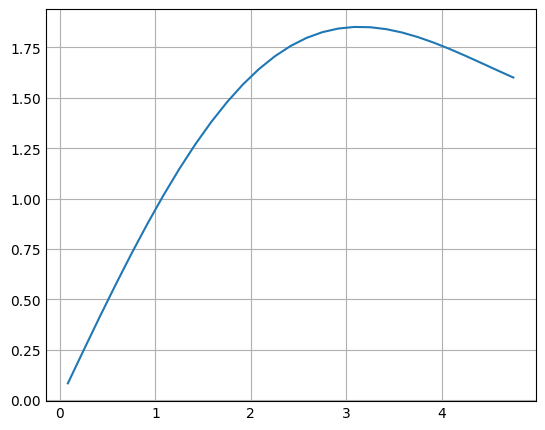

In [327]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys

# plot
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(x, y)

plt.show()

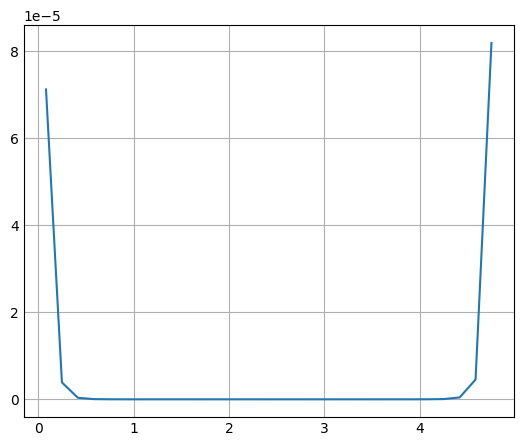

In [328]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys1

# plot
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(x, y)

plt.show()

### Узлы Чебышёва

In [329]:
from math import cos, pi

a, b, n = 0, 5, 30
Cheb_nodes = []

for k in range(1, n+1):
    x = 1/2*(a + b) + 1/2*(b - a) * cos( (2*k-1)/(2*n)*pi)
    Cheb_nodes.append(x)
Cheb_nodes.reverse()
print(Cheb_nodes)


[0.0034261631135654724, 0.030779148512155796, 0.08518543427732972, 0.16604893375699614, 0.2724836895290803, 0.4033235801364401, 0.5571350963575727, 0.7322330470336313, 0.9266990223754068, 1.1384024124624323, 1.3650237506511331, 1.6040801261367492, 1.852952387243698, 2.1089138373994225, 2.36916010939264, 2.63083989060736, 2.8910861626005775, 3.147047612756302, 3.3959198738632503, 3.634976249348867, 3.861597587537568, 4.073300977624594, 4.267766952966369, 4.442864903642427, 4.59667641986356, 4.72751631047092, 4.833951066243005, 4.91481456572267, 4.969220851487845, 4.9965738368864345]


In [330]:
#Полином Лагранжа в Чебышевских узлах

ksis, ys, ys1 = [], [], []
print("x,L(x),Error(x)")
for i in range(1, len(nodes)):
    ksi = (nodes[i] + nodes[i-1]) / 2
    y = Lagrange_polynomial(ksi, nodes=Cheb_nodes)
    y1 = Error(ksi, nodes=Cheb_nodes)
    #print(f"Lp({round(ksi, 3)}) = {round(y, 3)}", end = "     |    ")
    #print(f"Error({round(ksi, 3)}) = {y1}")
    print(f"{round(ksi, 3)},{y},{y1}")
    ksis.append(ksi)
    ys.append(y)
    ys1.append(y1)



x,L(x),Error(x)
0.083,0.08330285455899106,4.8260700991065164e-12
0.25,0.2491385183657474,3.099201451028932e-11
0.417,0.4126768545616087,5.658751245363192e-12
0.583,0.572428752528207,6.316314138388179e-11
0.75,0.7269678799367725,5.785794066071048e-11
0.917,0.8749540511390995,1.7310930466862828e-11
1.083,1.0151548940167,1.2007062011321068e-10
1.25,1.1464653947418058,2.89530843744501e-10
1.417,1.2679249484831419,6.313010114666895e-10
1.583,1.3787315826186683,6.517764106206414e-11
1.75,1.4782530987536457,2.147884092806862e-10
1.917,1.5660349354364596,3.8024094983768464e-10
2.083,1.641804620127142,8.730349776442381e-11
2.25,1.7054727581116125,2.939652965494588e-10
2.417,1.7571305741775651,2.6976310074644516e-10
2.583,1.797044095714235,1.703921004292397e-09
2.75,1.8256451401790477,1.506372804271905e-10
2.917,1.843519328433142,8.302269982607413e-11
3.083,1.851391403930785,3.6604097530812396e-10
3.25,1.8501082016448718,1.4751202481733117e-09
3.417,1.8406196518117672,6.122302664834933e-11
3.583

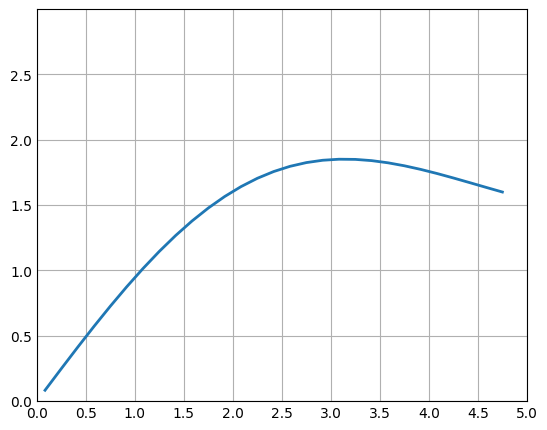

In [331]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys

# plot
plt.rcParams["figure.figsize"] = (5,4)
fig, ax = plt.subplots()


ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 5), xticks=np.arange(0, 5.5, 0.5),
       ylim=(0, 3), yticks=np.arange(0, 3, 0.5))

plt.show()

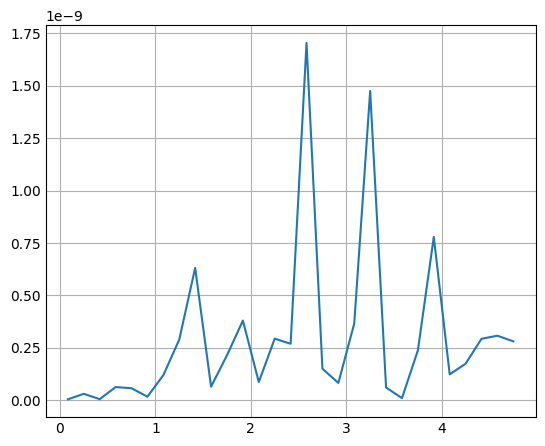

In [332]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys1

# plot
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(x, y)

plt.show()

### Полином Ньютона

In [333]:
a, b, n = 0, 5, 30
h = (b-a) / (n-1)
nodes = []
a1, b1 = a, b

while (a1 <= b1):     #находим узлы
    nodes.append(round(a1, 5))
    a1 += h

fnodes = [Si(x) for x in nodes]
Cheb_fnodes = [Si(x) for x in Cheb_nodes]
def razd_raz(x: list, y: list) -> list:
    """
    Вычисление разделенных разностей:
    x - узловый точки, y - разделенные разности 0-го порядка
    """
    n = len(y)
    res = y
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            res[i] = (res[i]-res[i-1])/(x[i]-x[i-j])
    return res

rr = razd_raz(nodes, fnodes)
print(rr)
Cheb_rr = razd_raz(Cheb_nodes, Cheb_fnodes)
print(Cheb_rr)

[0, 0.9983500714521929, -0.028607696121963507, -0.05432446913825849, 0.002823077024163297, 0.0015505962600035604, -9.866642734418664e-05, -2.389559452401492e-05, 1.0335913152915378e-06, 1.3720413002251937e-06, -1.540395255212091e-06, 1.806602431105892e-06, -1.9410898313595646e-06, 1.8906922228584532e-06, -1.6769249361906201e-06, 1.3617753913216254e-06, -1.0179272873331974e-06, 7.025734059763668e-07, -4.475085294289308e-07, 2.6184820009908074e-07, -1.3949246844263262e-07, 6.66713272024466e-08, -2.787050051745062e-08, 9.656400685707448e-09, -2.3534937937151027e-09, 3.318792914354578e-11, 4.010719519955891e-10, -3.0661893062733213e-10, 1.5781083682620287e-10]
[0.003426160879213435, 0.9999408600742711, -0.006631169457036631, -0.055457891254640734, 0.0009279549392020184, 0.0016496636357497432, -4.2274577571765265e-05, -2.8589019998169597e-05, 3.1133648960354867e-06, -2.5485284027228564e-06, 2.8189639630518446e-06, -2.2567778168467853e-06, 1.4698692754669861e-06, -7.980574038809991e-07, 3.64

In [334]:
def Newton_polynomial(x: float, nodes: list = nodes, rr: list = rr) -> float:
    """
    Полином Ньютона
    x - аргумент функции, nodes - узловые точки, rr - разделенные разности
    """
    n = len(rr)
    p = rr[-1]
    for i in range(n-1, -1, -1):
        p = rr[i] + (x - nodes[i])*p
    return p
    

def Error(x: float, nodes: list = nodes, rr: list = rr) -> float:
    """Погрешность полинома Ньютона
        x - аргумент функции, nodes - узловые точки, rr - разделенные разности
    """
    return abs(Si(x) - Newton_polynomial(x, nodes, rr))

for x in nodes:
    print(Error(x, nodes, rr), end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 1.1102230246251565e-16 0.0 0.0 0.0 0.0 0.0 2.220446049250313e-16 0.0 2.220446049250313e-16 0.0 2.220446049250313e-16 0.0 0.0 2.220446049250313e-16 0.0 0.0 0.0 2.220446049250313e-16 2.220446049250313e-16 2.886579864025407e-15 1.3322676295501878e-15 1.354472090042691e-14 8.415490526658687e-14 

In [335]:
ksis, ys, ys1 = [], [], []
print("x,L(x),Error(x)")
for i in range(1, len(nodes)):
    ksi = (nodes[i] + nodes[i-1]) / 2
    y = Newton_polynomial(ksi)
    y1 = Error(ksi)
    #print(f"Lp({round(ksi, 3)}) = {round(y, 3)}", end = "     |    ")
    #print(f"Error({round(ksi, 3)}) = {y1}")
    print(f"{round(ksi, 3)},{y},{y1}")
    ksis.append(ksi)
    ys.append(y)
    ys1.append(y1)

x,L(x),Error(x)
0.086,0.08630132223870393,0.00013190404830790148
0.259,0.25765379507281116,7.152143409794309e-06
0.431,0.42661136728400156,6.755742457120739e-07
0.603,0.5913742596745643,9.417658031196652e-08
0.776,0.7503818979643676,1.8190332684575594e-08
0.948,0.9021606625603917,4.364984929061677e-09
1.121,1.045378310215324,1.5553038856808143e-09
1.293,1.1788387917737644,8.617511149111579e-10
1.466,1.3015165019436088,1.4977108442337794e-10
1.638,1.4125816110463638,9.425615843383639e-11
1.81,1.5113908498356745,1.9826562613900478e-10
1.983,1.5975101468153525,9.886254037638764e-10
2.155,1.6707147763982564,2.0435919623196241e-10
2.328,1.7309874143652488,2.1041168807300892e-10
2.5,1.7785201721164494,3.802707038147446e-10
2.672,1.8136955154277652,1.1001120014952903e-09
2.845,1.837080694761531,4.864022518091815e-10
3.017,1.8494122841496698,4.9976445204436e-10
3.19,1.8515731852794044,8.261149542221347e-10
3.362,1.8445740462663747,1.2034533369842393e-09
3.534,1.829528737784566,3.52839757411516

### Графики полинома Ньютона и его погрешности

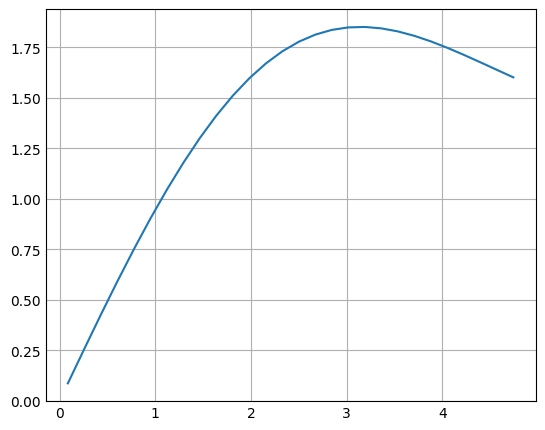

In [336]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys

# plot
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(x, y)

plt.show()

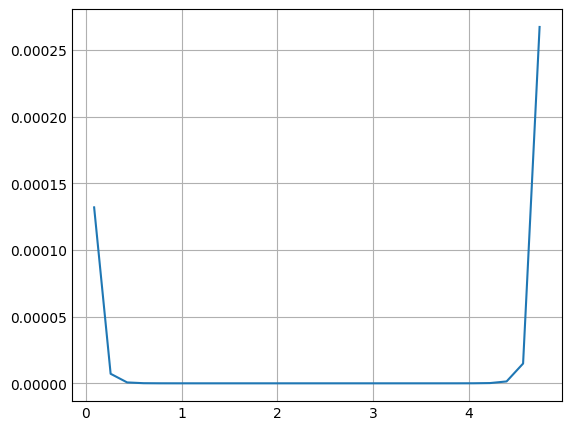

In [337]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys1

# plot
plt.rcParams["figure.figsize"] = (5,4)

plt.plot(x, y)

plt.show()

### Полином Ньютона в Чебышевских узлах

In [338]:
ksis, ys, ys1 = [], [], []

print("x,L(x),Error(x)")
for i in range(1, len(Cheb_nodes)):
    ksi = (Cheb_nodes[i] + Cheb_nodes[i-1]) / 2
    y = Newton_polynomial(ksi, nodes=Cheb_nodes, rr=Cheb_rr)
    y1 = Error(ksi, nodes=Cheb_nodes, rr=Cheb_rr)
    #print(f"Lp({round(ksi, 3)}) = {round(y, 3)}", end = "     |    ")
    #print(f"Error({round(ksi, 3)}) = {y1}")
    print(f"{round(ksi, 3)},{y},{y1}")
    ksis.append(ksi)
    ys.append(y)
    ys1.append(y1)


x,L(x),Error(x)
0.017,0.017102377817397846,7.89503913634082e-11
0.058,0.05797146294006365,8.302390719361341e-11
0.126,0.1255071139082409,9.63750190763335e-11
0.219,0.21868149889655616,8.470787959957704e-11
0.338,0.33576754834187783,1.0141254502826769e-10
0.48,0.4741189297773274,5.550337967008545e-12
0.645,0.6299827004811792,1.117217429680295e-12
0.829,0.7984081563012025,2.2817159273103016e-10
1.033,0.9733126368223426,7.171374605263736e-12
1.252,1.1477464445394587,1.5030532374282757e-10
1.485,1.314363433983018,5.6573945528271e-10
1.729,1.466056067898789,3.5653346941444397e-10
1.981,1.5966651210273208,1.1932967947103634e-09
2.239,1.7016400476091444,1.506541558171648e-10
2.5,1.7785201732520268,7.553067060683816e-10
2.761,1.8271358206611292,1.7322365764016467e-11
3.019,1.8494868130788262,2.50834464310401e-10
3.271,1.8493272844434578,1.77507009091471e-09
3.515,1.8315487719774743,2.3742918742186703e-10
3.748,1.8014895656502767,9.299316872102281e-11
3.967,1.7642988187371393,1.571509367082058e

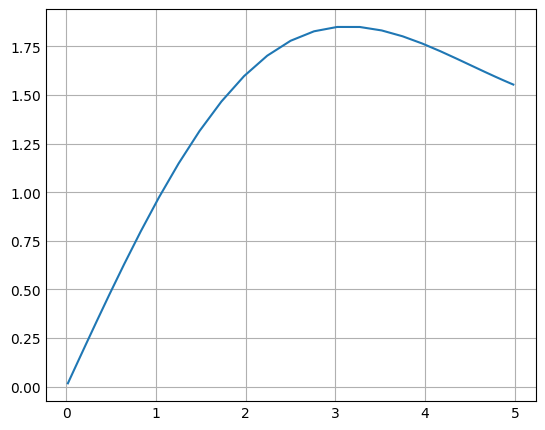

In [339]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys

# plot
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(x, y)
plt.show()

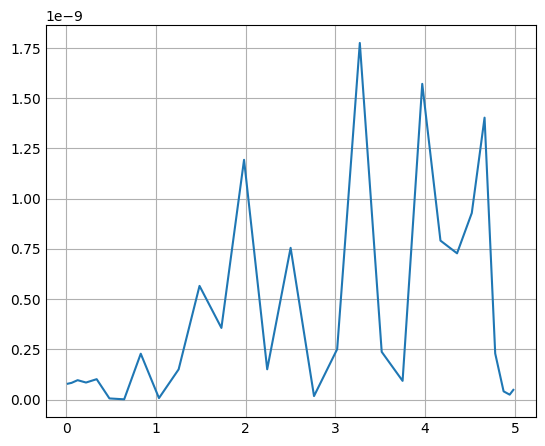

In [340]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = ksis
y = ys1

# plot
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(x, y)

plt.show()